# Exploratory Data Analysis
## CFPB Complaints

The purpose of this project is to download and explore a dataset using Python and associated libraries.

The dataset is about consumer complaints about finacial products and services collected by the Consumer Financial Protection Bureau (CFPB). The data can be downloaded from the [data.gov](https://www.data.gov) website which hosts the U.S Government's open data.

### Import Libraries

In [139]:
%matplotlib inline

import pandas as pd
import numpy as np
import json
import requests
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [141]:
warnings.simplefilter('ignore')
pd.set_option('display.max_colwidth',1000) # Show complete text in dataframe with truncating.

### Gather

Downloaded dataset manually as a csv file and saved it locally as the file is too large and is causing app to crash when I download automatically using the requests library. (should check this out to see why)

In [102]:
# Read csv file into Pandas DataFrame.
complaints_df = pd.read_csv('Consumer_Complaints.csv', parse_dates=True) 


In [104]:
col_names = ['Date_received', 'Product', 'Sub_product', 'Issue', 'Sub_issue',
       'Consumer_complaint_narrative', 'Company_public_response', 'Company',
       'State', 'Zip', 'Tags', 'Consumer_consent_provided?',
       'Submitted_via', 'Date_sent_to_company', 'Company_response_to_consumer',
       'Timely_response?', 'Consumer_disputed?', 'Complaint_ID']
complaints_df.columns = col_names

In [105]:
complaints_df['Date_received'] = pd.to_datetime(complaints_df['Date_received'])
complaints_df['Date_sent_to_company'] = pd.to_datetime(complaints_df['Date_sent_to_company'])

### Univariate Analysis
In this section, I will explore variables individually.

In [144]:
complaints_df.shape

(932473, 18)

In [145]:
complaints_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932473 entries, 0 to 932472
Data columns (total 18 columns):
Date_received                   932473 non-null datetime64[ns]
Product                         932473 non-null object
Sub_product                     697303 non-null object
Issue                           932473 non-null object
Sub_issue                       450184 non-null object
Consumer_complaint_narrative    227328 non-null object
Company_public_response         271533 non-null object
Company                         932473 non-null object
State                           922555 non-null object
Zip                             918556 non-null object
Tags                            129864 non-null object
Consumer_consent_provided?      410778 non-null object
Submitted_via                   932473 non-null object
Date_sent_to_company            932473 non-null datetime64[ns]
Company_response_to_consumer    932473 non-null object
Timely_response?                932473 non-null 

In [143]:
products = pd.DataFrame(complaints_df.Product.value_counts().reset_index())
products.columns = ['product', 'complaints']
products.count()

product       18
complaints    18
dtype: int64

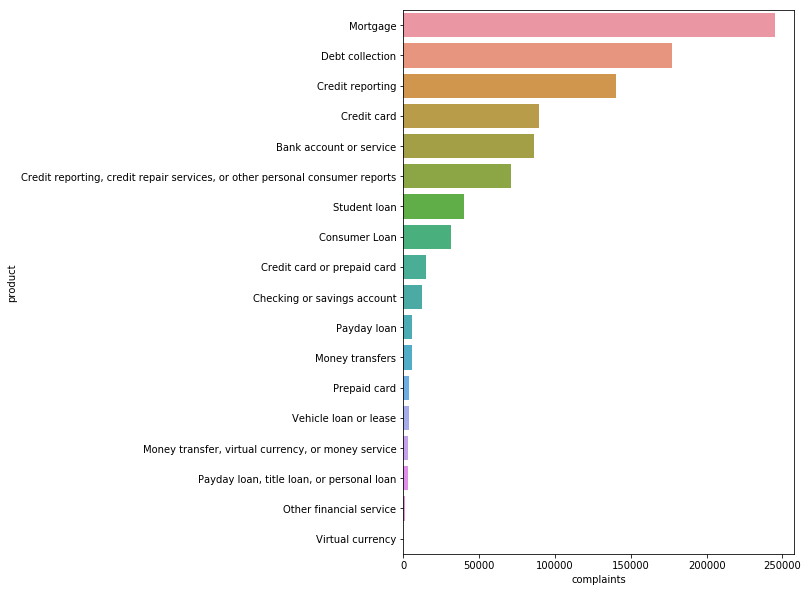

In [142]:
plt.figure(figsize=(7, 10))
sns.barplot(x='complaints', y='product', data=products)

In [160]:
complaints_df['year'] = complaints_df.Date_received.apply(lambda x: x.year)

In [179]:
a = complaints_df.groupby(['year', 'Product'], as_index=False).count()

In [188]:
a[a['year'] == 2017][['year', 'Product', 'Issue']]

,year,Product,Issue
53,2017,Bank account or service,6956
54,2017,Checking or savings account,12246
55,2017,Consumer Loan,3554
56,2017,Credit card,7133
57,2017,Credit card or prepaid card,14719
58,2017,Credit reporting,16587
59,2017,"Credit reporting, credit repair services, or other personal consumer reports",70732
60,2017,Debt collection,46761
61,2017,"Money transfer, virtual currency, or money service",2868
62,2017,Money transfers,440


count             697303
unique                75
top       Other mortgage
freq               86637
Name: Sub_product, dtype: object